# Métricas de regresión.

## Caso de Uso: Valoración Predial con Datos Sintéticos


Para ilustrar el efecto de los outliers y la utilidad de distintas métricas de regresión, se generó un conjunto de datos sintéticos que simula predios rurales con variables como:

* Distancia a la cabecera municipal (`CABECERA`)
* Distancia a drenaje doble (`Dren_Doble`)
* Distancia a vía pavimentada (`Via_Pav`)
* Estadísticas espectrales de bandas satelitales (`median_B1, median_B2, median_B3`)`

La variable objetivo es el valor por hectárea del predio (`Valor_Ha_V2`).

```{admonition} Recursos
:class: nota

[<span>&#x1F4E5;</span>1748985981_datos_municipio.csv)](Recursos/1748985981_datos_municipio.csv)

### Análisis del Problema

**Objetivo** Evaluar el comportamiento de distintos modelos de regresión, comparando métricas tradicionales y robustas, para identificar qué tan bien pueden predecir el valor de un predio.

### Métricas de Evaluación en Algoritmos de Regresión

Los algoritmos de regresión se utilizan para modelar la relación entre una **variable dependiente numérica** `Y` (también llamada *variable objetivo*, *target* o *output*) y una o más **variables independientes** `X` (también conocidas como *inputs*, *regresores* o *features*).

El objetivo de la regresión es encontrar una función que permita predecir o estimar el valor de `Y` a partir de los valores de `X`. Esta función se entrena a partir de un conjunto de datos , como se muestra a continuación:


$$(X_1, Y_1),\ (X_2, Y_2),\ (X_3, Y_3),\ ..., \ (X_n, Y_n)$$

Una vez entrenado el modelo, se evalua su rendimiento utilizando métricas de error que comparan las predicciones del modelo con los valores reales observados.

<p style="text-align: left; font-size: 14px;">
    <strong> Fig.1. </strong><br>
    Representación errores
   </p>


```{image} Imagenes/Error.png
:width: 600px
:align: left
:alt: unidad
```

<div style="clear: both;"></div> <p style="text-align: left; font-size: 14px;"> <strong>Nota.</strong> Imagen generada con inteligencia artificial por ChatGPT (OpenAI), 2025. </p>


#### Error cuadrático Medio (MSE)

El error cuadrático medio, también conocido como mean squared error (MSE) en inglés, es una métrica comúnmente utilizada para evaluar la calidad de un modelo de regresión.

$$MSE = {\frac{1}{n}\sum_{i=1}^{n}(Y_i-\widehat{Y}_i)^2} $$

donde

*	$MSE$: Error cuadrático medio.
*	$n$: Número total de puntos de datos.
*	$\widehat{Y}_i $: Valor predicho por el modelo.
*	$Y_i$: Valor real de la variable dependiente.


#### Error Absoluto Medio (MAE)

El Error Absoluto Medio o Mean Absolute Error (MAE)  en inglés, se calcula como la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.


$$ MAE= {\frac{1}{n}\sum_{i=1}^{n}\left |Y_i-\widehat{Y}_i\right |}$$

donde

*	$MAE$: Erroo Medio
*	$n$: Número total de puntos de datos.
*	$\widehat{Y}_i $: Valor predicho por el modelo.
*	$Y_i$: Valor real de la variable dependiente.



#### Error Cuadrático Medio de la Raíz (RMSE)

 EL Error Cuadrático Medio de la Raíz oRoot Mean Square Error (RMSE). Al igual que el MAE, el RMSE mide la diferencia entre las predicciones del modelo y los valores reales. Sin embargo, el RMSE penaliza más los errores grandes debido al cálculo de la raíz cuadrada del Error Cuadrático Medio (RMSE).


 $$\sqrt{{\frac{\sum_{i=1}^{n}(Y_i-\widehat{Y}_i)^{2}}{n}}}$$


 donde

*	$RMSE$: Error Cuadrático Medio de la Raíz
*	$n$: Número total de puntos de datos.
*	$\widehat{Y}_i $: Valor predicho por el modelo.
*	$Y_i$: Valor real de la variable dependiente

#### Coeficite de determinación $R^2$

El coeficite de determinaciónen, comúnmente denotado como R^2, es una medida estadística utilizada en la regresión para evaluar la calidad de ajuste de un modelo a los datos observados. R^2 proporciona una medida de qué tan bien las variaciones en la variable dependiente pueden ser explicadas por las variaciones en las variables independientes incluidasen el modelo.

El coeficiente de determinación tiene un rango de 0 a 1, donde:

* $R^2$ = 0 indica que el modelo no puede explicar la variabilidad de los datos y no se ajusta en absoluto.
* $R^2$ = 1 indica que el modelo explica toda la variabilidad en los datos y se ajusta perfectamente.

$$R^2 = 1 - \frac{{SSR}}{{SST}}$$


$$R^2 = 1 - \frac{{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2}}{{ \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$


#### MAPE – Mean Absolute Percentage Error

El **Error Absoluto Porcentual Medio (MAPE)** es una métrica que indica el promedio del error en las predicciones, expresado como un porcentaje del valor real. Es especialmente útil porque permite interpretar el rendimiento del modelo en términos relativos: *¿en promedio, en qué porcentaje se equivoca el modelo?*


$$MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{Y_i - \hat{Y}_i}{Y_i} \right|$$

In [1]:
import os

In [2]:
%%capture
#Crear carpeta para almacenar insumos
os.makedirs("/content/Recursos", exist_ok=True)

#Descargar el ZIP desde GitHub
!wget https://github.com/Luisafrodriguezo1/Diplomado_PDI/raw/refs/heads/main/D2M1_2_supervisado/D2M1_21_Metricas_regresion_recurso.zip -O /content/Recursos/D2M1_21_Metricas_regresion_recurso.zip

#Descomprimir
!unzip /content/Recursos/D2M1_21_Metricas_regresion_recurso.zip -d /content/Recursos


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format  # 2 decimales, sin notación científica
path = "/content/Recursos/D2M1_21_Metricas_regresion_recurso/1748985981_datos_municipio.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()


(193, 9)


,ID,CABECERA,Dren_Doble,Via_Pav,median_B1,median_B2,median_B3,Valor_Ha_V2,Codigo_Municipio
0,1,"7,553.35","9,648.37","1,264.39",901.36,"1,024.34",592.57,"4,850,341.45",27001
1,2,"19,019.21","1,307.89","10,833.56",967.15,691.52,770.95,"100,000.00",5001
2,3,"14,666.68","2,466.35","6,077.87",906.21,945.77,936.47,"5,526,381.40",54001
3,4,"12,013.30","13,483.39","9,922.70",853.22,964.03,866.11,"100,000.00",11001
4,5,"3,204.77","9,116.11","3,860.99",872.38,854.48,903.28,"5,250,167.84",11001


El conjunto de datos utilizado contiene 9 campos en total. La variable de interés o variable objetivo es `Valor_Ha_V2`, que representa el valor estimado por hectárea de cada predio. Las columnas `ID` y `Codigo_Municipio` están presentes únicamente como identificadores y no se incluyen como variables predictoras en el modelado.

Se selecciona variables predictoras y objetivo

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import numpy as np


X = df[['CABECERA', 'Dren_Doble', 'Via_Pav', 'median_B1', 'median_B2', 'median_B3']]
y = df['Valor_Ha_V2']



Se divide en conjuntos de entrenamiento y prueba

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
dimensiones = {
    'X_train': X_train.shape,
    'X_test': X_test.shape,
    'y_train': y_train.shape,
    'y_test': y_test.shape
}

dimensiones

{'X_train': (154, 6), 'X_test': (39, 6), 'y_train': (154,), 'y_test': (39,)}

Se entrena el modelo

In [6]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Realice la predicciones

In [7]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

Se crea funciónpara calcular todas las métricas

In [8]:

def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, r2, mape


Calcular métricas para ambos modelos

In [9]:

metricas_lr = calcular_metricas(y_test, y_pred_lr)
metricas_rf = calcular_metricas(y_test, y_pred_rf)

In [10]:
df_metricas = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Regresión Lineal': metricas_lr,
    'Random Forest': metricas_rf
})
df_metricas

,Métrica,Regresión Lineal,Random Forest
0,MAE,"888,905.05","1,013,607.88"
1,MSE,"6,184,026,687,814.53","4,735,773,266,352.07"
2,RMSE,"2,486,770.33","2,176,183.19"
3,R²,0.52,0.63
4,MAPE (%),111.06,145.41




| Métrica     | ¿Qué penaliza más esta métrica?                                     | Modelo sugerido         |
|-------------|----------------------------------------------------------------------|--------------------------|
| MAE         | Penaliza todos los errores por igual                                 | Random Forest         |
| MSE         | Penaliza fuertemente los errores grandes                             | Random Forest          |
| RMSE        | Penaliza más los errores grandes, pero con interpretación directa    | Random Forest          |
| R²          | Penaliza el mal ajuste general del modelo                            | Random Forest         |
| MAPE (%)    | Penaliza errores porcentuales altos                                  | Regresión Lineal            |


In [11]:

df_comparacion = pd.DataFrame({
    'Valor_Real': y_test.values,
    'Pred_RF': y_pred_rf,
    'Pred_LR': y_pred_lr,
    'Diferencia_RF': np.abs(y_test.values - y_pred_rf),
    'Diferencia_LR': np.abs(y_test.values - y_pred_lr)
})


df_comparacion_ordenado = df_comparacion.sort_values(by='Valor_Real', ascending=False).reset_index(drop=True)

df_comparacion_ordenado.head(3)




,Valor_Real,Pred_RF,Pred_LR,Diferencia_RF,Diferencia_LR
0,"20,324,750.73","9,017,565.66","6,312,369.55","11,307,185.07","14,012,381.18"
1,"9,191,802.64","3,758,132.35","3,452,019.36","5,433,670.28","5,739,783.28"
2,"7,108,561.72","6,172,211.50","6,813,928.42","936,350.22","294,633.29"


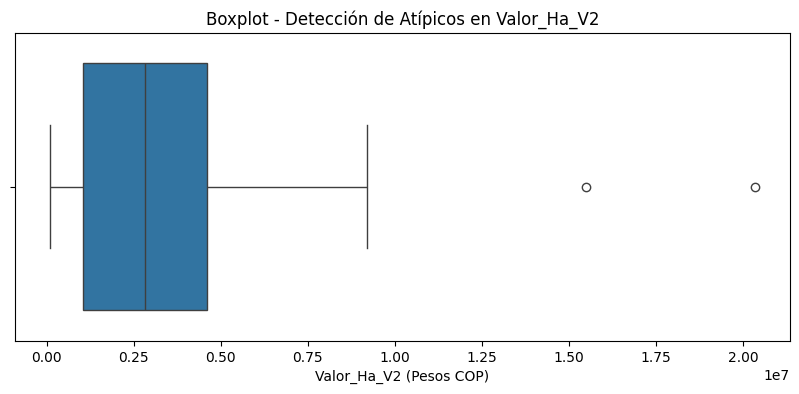

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Valor_Ha_V2'])
plt.title("Boxplot - Detección de Atípicos en Valor_Ha_V2")
plt.xlabel("Valor_Ha_V2 (Pesos COP)")
plt.show()




```{admonition} Actividad: Análisis de errores grandes en las predicciones
:class: important
1. A partir de la tabla de predicciones ya generada, filtra las filas donde la diferencia entre el valor real y las predicciones del modelo sea mayor a 1.200.000 para cada modelo.

* Diferencia del modelo Random Forest: `Diferencia_RF > 1_200_000`

* Diferencia del modelo de Regresión Lineal: `Diferencia_LR > 1_200_000`

2.Cuenta cuántos casos cumplen esta condición para cada modelo.

3.¿Cómo crees que estos errores tan altos afectan las métricas de evaluación como el MAE, el RMSE y el MAPE (%)?
```


### Métricas robustas para regresión con outliers

Cuando se trabaja con datos que tienen valores atípicos en la variable de respuesta, es importante usar métricas de evaluación que no se vean afectadas excesivamente por estos valores.

#### MedAE – Error Absoluto Mediano

El Error Absoluto Mediano (MedAE) mide la mediana de los errores absolutos entre las predicciones y los valores reales.


$$\text{MedAE} = \text{mediana} \left( \left| y_i - \hat{y}_i \right| \right)$$

- No se ve afectado por errores muy grandes.
- Es útil cuando se desea conocer el error típico sin que unos pocos valores extremos distorsionen la medida.

#### MdAPE (%) – Error Porcentual Absoluto Mediano

El MdAPE mide el error relativo como porcentaje y toma la mediana, haciéndolo más estable que el MAPE tradicional.


$$\text{MdAPE} = \text{mediana} \left( \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 \right)$$

- Permite comparar errores proporcionales entre observaciones.
- Es menos sensible a outliers que el MAPE.


#### MSLE – Error Cuadrático Medio Logarítmico

La MSLE aplica un logaritmo a los valores reales y predichos antes de calcular el error cuadrático medio:


$$\text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2$$

- Suaviza el impacto de valores grandes.
- Penaliza más los errores cuando el modelo subestima.
- Útil para datos positivos con gran variación o crecimiento exponencial (como precios o población).




In [13]:
from sklearn.metrics import mean_squared_log_error

def calcular_metricas_robustas(y_true, y_pred):
    medae = median_absolute_error(y_true, y_pred)
    mdape = np.median(np.abs((y_true - y_pred) / y_true) * 100)
    msle = mean_squared_log_error(y_true, np.clip(y_pred, a_min=0, a_max=None))
    return medae, mdape, msle


In [14]:
metricas_robustas_lr = calcular_metricas_robustas(y_test, y_pred_lr)
metricas_robustas_rf = calcular_metricas_robustas(y_test, y_pred_rf)

In [15]:
df_metricas_robustas= pd.DataFrame({
    'Métrica': ['MedAE', 'MdAPE (%)', 'MSLE'],
    'Regresión Lineal': metricas_robustas_lr,
    'Random Forest': metricas_robustas_rf
})

In [16]:
df_metricas_union= pd.concat([df_metricas_robustas, df_metricas], ignore_index=True)
df_metricas_union


,Métrica,Regresión Lineal,Random Forest
0,MedAE,"326,212.45","442,757.89"
1,MdAPE (%),24.20,40.43
2,MSLE,11.14,0.85
3,MAE,"888,905.05","1,013,607.88"
4,MSE,"6,184,026,687,814.53","4,735,773,266,352.07"
5,RMSE,"2,486,770.33","2,176,183.19"
6,R²,0.52,0.63
7,MAPE (%),111.06,145.41



```{admonition} Actividad: Interpretación de métricas robustas frente a outliers
:class: important

Instrucciones:

1.Observa los resultados obtenidos para las siguientes métricas MedAE, MdAPE (%) y MSLE

2.Compara estos valores con los de las métricas tradicionales (MAE, RMSE, MAPE).

a) ¿Cuál de estas métricas parece menos afectada por valores atípicos?

b) ¿Cuál proporciona una visión más realista del error  del modelo?
```

## Conclusiones

* Cada métrica revela un aspecto distinto del desempeño del modelo. Combinar métricas tradicionales y robustas permite tomar decisiones más informadas.

* En el ejercicio, se observó cómo unos pocos errores muy altos elevaban de manera considerable el RMSE y el MAE, lo que hacía parecer que el modelo era peor de lo que realmente era en la mayoría de los casos.

* Métricas como el MedAE y el MdAPE son más estables porque se basan en la mediana, no en el promedio. Por eso, reflejan mejor el comportamiento general del modelo sin dejarse llevar por valores extremos.


## Referencia

* Lewinson, E. (2023, April 20). *A Comprehensive Overview of Regression Evaluation Metrics*. NVIDIA Developer Blog.  
Disponible en: [https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/](https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/)



* Sagi, O. (s.f.). *Model performance metrics for regression models*.  
Pecan AI Help Center. Recuperado de:  
[https://help.pecan.ai/en/articles/6456388-model-performance-metrics-for-regression-models](https://help.pecan.ai/en/articles/6456388-model-performance-metrics-for-regression-models)  


